- Nombre: Marcus Alexander Mayorga Martínez
- Fecha: 25 de mayo del 2025
- Paralelo: 2do A

In [9]:
import numpy as np
import timeit #Para medir tiempos de ejecución
import matplotlib.pyplot as plt #Para graficar

### Ejercicio 1: Producto Hadamard y Producto Punto

In [10]:
#Generar matrices aleatorias A y B de 200x200
A = np.random.rand(200, 200)
B = np.random.rand(200, 200)
print(f"Forma de A: {A.shape}, Forma de B: {B.shape}\n")

#a) Producto Hadamard (element-wise product)
#Se realiza con el operador * o np.multiply()
hadamard_product = A * B

#Opcionalmente: hadamard_product_np = np.multiply(A, B)
print("Primeros 5x5 del Producto Hadamard (A * B):")
print(hadamard_product[:5, :5], "\n")

#b) Producto punto (matrix multiplication)
#Se realiza con el operador @ o np.dot() o np.matmul()
dot_product = A @ B

print("Primeros 5x5 del Producto Punto (A @ B):")
print(dot_product[:5, :5], "\n")

#c) Comparación de tiempos con timeit
setup_code = """
import numpy as np
A = np.random.rand(200, 200)
B = np.random.rand(200, 200)
"""

time_hadamard = timeit.timeit("A * B", setup=setup_code, number=1000)
time_dot = timeit.timeit("A @ B", setup=setup_code, number=1000)

print(f"Tiempo promedio para Producto Hadamard (1000 ejecuciones): {time_hadamard / 1000:.8f} segundos")
print(f"Tiempo promedio para Producto Punto (1000 ejecuciones): {time_dot / 1000:.8f} segundos")

if time_dot > time_hadamard:
    print(f"El producto punto fue {time_dot/time_hadamard:.2f} veces más lento que el producto Hadamard.")
else:
    print(f"El producto Hadamard fue {time_hadamard/time_dot:.2f} veces más lento que el producto punto.")
print("\n")

Forma de A: (200, 200), Forma de B: (200, 200)

Primeros 5x5 del Producto Hadamard (A * B):
[[0.17123786 0.16851865 0.49665997 0.16519851 0.05344161]
 [0.3487886  0.61549434 0.18552097 0.21807117 0.17873818]
 [0.47269936 0.15176863 0.11861694 0.06114196 0.34531754]
 [0.74883017 0.55778776 0.20871547 0.14669655 0.17786544]
 [0.31572055 0.06429538 0.37264934 0.06673754 0.03718819]] 

Primeros 5x5 del Producto Punto (A @ B):
[[52.65996124 53.23083581 53.55017349 49.76128239 50.84510164]
 [50.7557122  51.05592506 49.15620403 50.60604821 49.47782264]
 [47.93533991 50.8606154  47.56585951 47.08263025 47.06583282]
 [52.93060199 51.83306111 52.12527583 51.01144408 48.64618344]
 [52.57492023 52.05393001 50.73413107 49.54628024 48.90927884]] 

Tiempo promedio para Producto Hadamard (1000 ejecuciones): 0.00004749 segundos
Tiempo promedio para Producto Punto (1000 ejecuciones): 0.00062832 segundos
El producto punto fue 13.23 veces más lento que el producto Hadamard.




### Ejercicio 3: Sistema de Ecuaciones Lineales

Usando N = 5 y bk = [1. 1. 1. 1. 1.]

k | Cond(Ak)     | Norma de xk
------------------------------------
 1 |   6.0000e+00 | 3.7268e-01
 2 |   1.1000e+01 | 2.0328e-01
 3 |   1.6000e+01 | 1.3975e-01
 4 |   2.1000e+01 | 1.0648e-01
 5 |   2.6000e+01 | 8.6003e-02
 6 |   3.1000e+01 | 7.2131e-02
 7 |   3.6000e+01 | 6.2113e-02
 8 |   4.1000e+01 | 5.4538e-02
 9 |   4.6000e+01 | 4.8610e-02
10 |   5.1000e+01 | 4.3844e-02
11 |   5.6000e+01 | 3.9930e-02
12 |   6.1000e+01 | 3.6657e-02
13 |   6.6000e+01 | 3.3880e-02
14 |   7.1000e+01 | 3.1494e-02
15 |   7.6000e+01 | 2.9422e-02
16 |   8.1000e+01 | 2.7606e-02
17 |   8.6000e+01 | 2.6001e-02
18 |   9.1000e+01 | 2.4572e-02
19 |   9.6000e+01 | 2.3292e-02
20 |   1.0100e+02 | 2.2139e-02


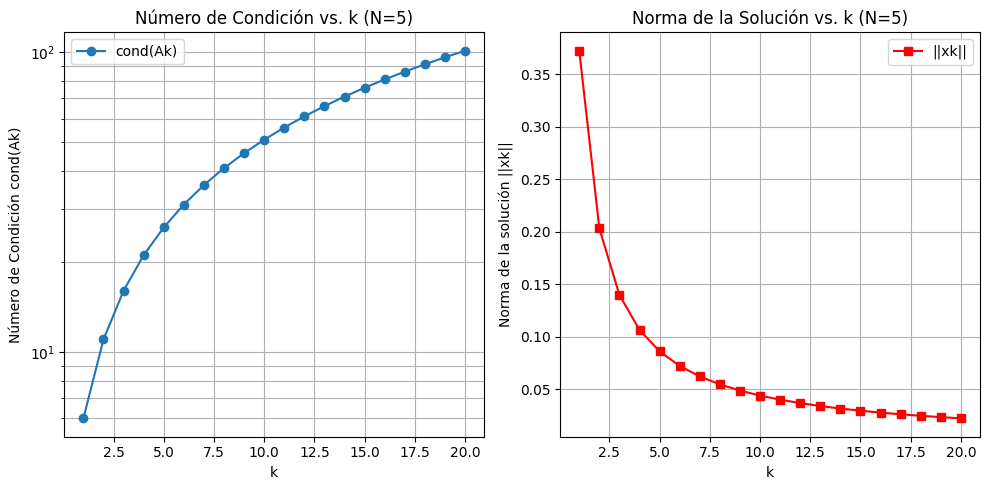

In [11]:
#Definir el tamaño de las matrices (N x N)
N = 5
I = np.eye(N)
J = np.ones((N, N))

#Definir un vector bk
bk_example = np.ones(N)

# bk_example = np.arange(1, N + 1)
# bk_example = np.random.rand(N)
print(f"Usando N = {N} y bk = {bk_example}\n")

k_values = np.arange(1, 21)
condition_numbers = []

#Observamos cómo cambian las soluciones
solutions_norms = []

print("k | Cond(Ak)     | Norma de xk")
print("------------------------------------")

for k_val in k_values:

    #Construir Ak
    Ak = I + k_val * J

    #a) Resolver Ak x = bk
    try:
        xk = np.linalg.solve(Ak, bk_example)
        solutions_norms.append(np.linalg.norm(xk))
    except np.linalg.LinAlgError:
        print(f"k={k_val}: Sistema singular, no se puede resolver.")
        xk = np.full(N, np.nan) #Marcar como no resuelto
        solutions_norms.append(np.nan)


    #b) Calcular el número de condición de Ak
    cond_Ak = np.linalg.cond(Ak)
    condition_numbers.append(cond_Ak)

    print(f"{k_val:2} | {cond_Ak:12.4e} | {np.linalg.norm(xk):.4e}")

#Graficar k vs. número de condición
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, condition_numbers, 'o-', label='cond(Ak)')
plt.xlabel('k')
plt.ylabel('Número de Condición cond(Ak)')
plt.title(f'Número de Condición vs. k (N={N})')
plt.yscale('log') #Es común que los números de condición crezcan mucho
plt.grid(True, which="both", ls="-")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, solutions_norms, 's-', label='||xk||', color='red')
plt.xlabel('k')
plt.ylabel('Norma de la solución ||xk||')
plt.title(f'Norma de la Solución vs. k (N={N})')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()